In [321]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math

In [322]:
#from google.colab import drive
#drive.mount('/content/drive')

In [323]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

### Reading in data from various sensors stored in  csv files for airquality data
1. Get a list of all the filenames containing data from various sensors using the os python module.
2. Turn those into a list of dataframes using pandas

In [324]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

In [325]:
#airquality_data = combined_df
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'
#unit_name = 'Makindye'
#base_dir = os.path.join(base_dir, unit_name)

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)')

airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
filepath = os.path.join(base_dir,'Makerere')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir, 'Makindye')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Mulagox')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Lubowa')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)',' merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)')

#airquality_data = pd.read_csv(os.path.join(base_dir, 'Rubaga_Mobile',' merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir, 'Rubaga_Mobile')

airquality_data.head(10)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,MOD13A3_006_Line_Y_1km,MOD13A3_006_Sample_X_1km,EVI,NDVI,MOD13A3_006__1_km_monthly_VI_Quality,...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09 18:00:00,5.52,6.93,9.73,18,1160.0,308.0,0.2133,0.3988,2185.0,...,23.27,0.44,0,0,0,0,0,1,0,0
1,2017-09-09 19:00:00,7.89,9.97,14.24,19,1160.0,308.0,0.2133,0.3988,2185.0,...,22.72,0.38,0,0,1,0,0,0,0,0
2,2017-09-09 20:00:00,9.55,12.09,16.99,20,1160.0,308.0,0.2133,0.3988,2185.0,...,22.29,0.37,0,0,0,0,0,1,0,0
3,2017-09-09 21:00:00,10.09,12.97,18.97,21,1160.0,308.0,0.2133,0.3988,2185.0,...,21.71,0.34,0,1,0,0,0,0,0,0
4,2017-09-09 22:00:00,9.66,12.53,18.17,22,1160.0,308.0,0.2133,0.3988,2185.0,...,20.86,0.29,0,0,1,0,0,0,0,0
5,2017-09-09 23:00:00,10.01,12.87,18.33,23,1160.0,308.0,0.2133,0.3988,2185.0,...,20.30,0.46,0,0,0,0,0,1,0,0
6,2017-09-10 00:00:00,9.37,11.92,16.35,0,1160.0,308.0,0.2133,0.3988,2185.0,...,20.30,0.59,0,0,0,0,0,1,0,0
7,2017-09-10 01:00:00,9.29,11.66,15.12,1,1160.0,308.0,0.2133,0.3988,2185.0,...,20.14,0.99,0,0,0,0,0,1,0,0
8,2017-09-10 02:00:00,9.91,12.43,15.28,2,1160.0,308.0,0.2133,0.3988,2185.0,...,20.15,1.19,0,0,0,0,0,1,0,0
9,2017-09-10 03:00:00,8.61,10.61,12.72,3,1160.0,308.0,0.2133,0.3988,2185.0,...,19.78,0.69,1,0,0,0,0,0,0,0


In [326]:
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

In [327]:
#airquality_data = airquality_data.drop(['Hour'], axis=1)

In [328]:
airquality_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,MOD13A3_006_Line_Y_1km,MOD13A3_006_Sample_X_1km,EVI,NDVI,MOD13A3_006__1_km_monthly_VI_Quality,humidity (%),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,5.52,6.93,9.73,18,1160.0,308.0,0.2133,0.3988,2185.0,73,...,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,7.89,9.97,14.24,19,1160.0,308.0,0.2133,0.3988,2185.0,77,...,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,9.55,12.09,16.99,20,1160.0,308.0,0.2133,0.3988,2185.0,80,...,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,10.09,12.97,18.97,21,1160.0,308.0,0.2133,0.3988,2185.0,82,...,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,9.66,12.53,18.17,22,1160.0,308.0,0.2133,0.3988,2185.0,87,...,20.86,0.29,0,0,1,0,0,0,0,0


In [329]:
airquality_data.tail()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,MOD13A3_006_Line_Y_1km,MOD13A3_006_Sample_X_1km,EVI,NDVI,MOD13A3_006__1_km_monthly_VI_Quality,humidity (%),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,,
2019-03-31 19:00:00,4.69,6.00,6.02,19,1160.0,308.0,0.2376,0.3732,2445.0,73,...,24.46,0.44,0,0,0,0,0,0,1,0
2019-03-31 20:00:00,4.64,5.88,5.90,20,1160.0,308.0,0.2376,0.3732,2445.0,80,...,23.84,0.51,0,0,0,0,0,0,0,1
2019-03-31 21:00:00,5.07,6.35,6.36,21,1160.0,308.0,0.2376,0.3732,2445.0,83,...,23.47,0.58,0,0,0,0,0,1,0,0
2019-03-31 22:00:00,6.17,7.54,7.55,22,1160.0,308.0,0.2376,0.3732,2445.0,83,...,23.10,0.49,0,0,0,0,1,0,0,0
2019-03-31 23:00:00,7.34,8.72,8.73,23,1160.0,308.0,0.2376,0.3732,2445.0,81,...,22.77,0.40,0,0,0,0,0,1,0,0


In [330]:
show_dataframe_info(airquality_data)

(12485, 23)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'MOD13A3_006_Line_Y_1km', 'MOD13A3_006_Sample_X_1km', 'EVI', 'NDVI', 'MOD13A3_006__1_km_monthly_VI_Quality', 'humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12485 entries, 2017-09-09 18:00:00 to 2019-03-31 23:00:00
Data columns (total 23 columns):
PM1(Ug/m3)                              12485 non-null float64
PM2.5(Ug/m3)                            12485 non-null float64
PM10(Ug/m3)                             12485 non-null float64
hour                                    12485 non-null int64
MOD13A3_006_Line_Y_1km                  12485 non-null float64
MOD13A3_006_Sample_X_1km                12485 non-null float64
EVI                               

In [331]:
airquality_data.describe()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,MOD13A3_006_Line_Y_1km,MOD13A3_006_Sample_X_1km,EVI,NDVI,MOD13A3_006__1_km_monthly_VI_Quality,humidity (%),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
count,1.248500e+04,12485.000000,12485.000000,12485.000000,12485.0,12485.0,12485.000000,12485.000000,12485.000000,12485.000000,...,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000,12485.000000
mean,3.028915e+14,10.673821,15.369912,11.499960,1160.0,308.0,0.210689,0.379469,2184.886584,-100.709251,...,22.567326,-101.547885,0.103564,0.063356,0.074329,0.098438,0.214257,0.219143,0.123588,0.103324
std,1.971218e+15,7.022369,11.679562,6.922913,0.0,0.0,0.034487,0.042931,104.165659,1331.806401,...,3.449116,1007.269962,0.304707,0.243612,0.262316,0.297918,0.410322,0.413682,0.329124,0.304394
min,1.000000e-02,0.010000,0.010000,0.000000,1160.0,308.0,0.158000,0.292000,2112.000000,-9998.000000,...,15.470000,-9998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.520000e+00,6.790000,9.510000,5.000000,1160.0,308.0,0.178400,0.345000,2112.000000,66.000000,...,19.870000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.830000e+00,10.820000,14.240000,11.000000,1160.0,308.0,0.212600,0.373200,2181.000000,82.000000,...,21.580000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.910000e+00,12.430000,18.170000,18.000000,1160.0,308.0,0.237600,0.417300,2181.000000,91.000000,...,25.140000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.313056e+16,210.400000,228.260000,23.000000,1160.0,308.0,0.270800,0.449100,2445.000000,100.000000,...,33.370000,36.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separate Features From the Target

In [332]:
#target_column = 'PM2.5(Ug/m3)'
#feature_columns = [x for x in airquality_data.columns if x != target_column]
feature_columns = [0,2, 3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19]
target_column = [1]
features = airquality_data.iloc[:,feature_columns]
targets = airquality_data.iloc[:,target_column]

In [333]:
features.head()

,PM1(Ug/m3),PM10(Ug/m3),hour,MOD13A3_006_Line_Y_1km,MOD13A3_006_Sample_X_1km,EVI,MOD13A3_006__1_km_monthly_VI_Quality,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S
TimeStamp,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,5.52,9.73,18,1160.0,308.0,0.2133,2185.0,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0
2017-09-09 19:00:00,7.89,14.24,19,1160.0,308.0,0.2133,2185.0,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0
2017-09-09 20:00:00,9.55,16.99,20,1160.0,308.0,0.2133,2185.0,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0
2017-09-09 21:00:00,10.09,18.97,21,1160.0,308.0,0.2133,2185.0,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0
2017-09-09 22:00:00,9.66,18.17,22,1160.0,308.0,0.2133,2185.0,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0


In [334]:
targets.head()

,PM2.5(Ug/m3)
TimeStamp,
2017-09-09 18:00:00,6.93
2017-09-09 19:00:00,9.97
2017-09-09 20:00:00,12.09
2017-09-09 21:00:00,12.97
2017-09-09 22:00:00,12.53



### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [335]:
training_data = len(airquality_data)
print(training_data)

training_data_length = math.floor(len(airquality_data)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

12485
8739
1248
2497
12484


In [336]:
training_features = features.iloc[0:training_data_length,:]
print(training_features.shape)
training_targets =  targets.iloc[0:training_data_length,:]
print(training_targets.shape)

validation_features = features.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_features.shape)
validation_targets =  targets.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_targets.shape)

testing_features = features.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_features.shape)

testing_targets = targets.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_targets.shape)

(8739, 18)
(8739, 1)
(1248, 18)
(1248, 1)
(2497, 18)
(2497, 1)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

### given data that goes back 3hrs, can we predict the next hour.

### training dataset

In [337]:
scaler = MinMaxScaler()
scaled_training_features = scaler.fit_transform(training_features)
print(scaled_training_features)
print(scaled_training_features.shape)

training_targets =  np.array(training_targets)
training_targets = training_targets.reshape(-1,1)
print('trainging target shape: ', training_targets.shape)

##given data that goes back 3hrs, can we predict the next hour.
forecasters = [] 
pollution_real = [] 
for i in range(1, scaled_training_features.shape[0]):
    forecasters.append(scaled_training_features[i-1:i, 0:18])
    pollution_real.append(training_targets[i, 0])
    
forecasters, pollution_real = np.array(forecasters), np.array(pollution_real)

print(pollution_real.shape)
print(forecasters.shape)
print(forecasters.shape[1])

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[[4.19631862e-16 4.57734872e-02 7.82608696e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.00126873e-16 6.70120085e-02 8.26086957e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.26549540e-16 7.99623263e-02 8.69565217e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [6.00126873e-16 6.70120085e-02 8.26086957e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.26549540e-16 7.99623263e-02 8.69565217e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.67674985e-16 8.92865552e-02 9.13043478e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
(8739, 18)
trainging target shape:  (8739, 1)
(8738,)
(8738, 1, 18)
1


### validation dataset

In [338]:
scaled_validation_features = scaler.fit_transform(validation_features)
print(scaled_validation_features)
forecasters_validation = [] 
pollution_real_validation = [] 

validation_targets =  np.array(validation_targets)
validation_targets= validation_targets.reshape(-1,1)
print(validation_targets.shape)

for i in range(1, scaled_validation_features.shape[0]):
    forecasters_validation.append(scaled_validation_features[i-1:i, 0:18])
    pollution_real_validation.append(validation_targets[i, 0])
    
forecasters_validation, pollution_real_validation = np.array(forecasters_validation), np.array(pollution_real_validation)
#baseline_prediction_validation_values, baseline_actual_validation_values = np.array(baseline_prediction_validation_values),
#np.array(baseline_actual_validation_values)
print(forecasters_validation.shape)
print(pollution_real_validation.shape)

[[6.97609411e-16 2.06928949e-01 9.56521739e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [7.24264793e-16 2.08807986e-01 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [6.75523524e-16 1.85554903e-01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [2.39898433e-16 4.15736935e-02 8.26086957e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.88639702e-16 5.00293600e-02 8.69565217e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.09202425e-16 5.33176747e-02 9.13043478e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
(1248, 1)
(1247, 1, 18)
(1247,)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Testing dataset

In [339]:
scaled_testing_features = scaler.fit_transform(testing_features)
print(scaled_testing_features)
forecasters_test = [] 
pollution_real_test = [] 

testing_targets =  np.array(testing_targets)
testing_y_values = testing_targets
testing_targets = testing_targets.reshape(-1,1)
print('Testing Y values shape: ',testing_y_values.ravel().shape)
print('Testing targets shape: ',testing_targets.shape)

for i in range(1, scaled_testing_features.shape[0]):
    forecasters_test.append(scaled_testing_features[i-1:i, 0:18])
    pollution_real_test.append(testing_targets[i, 0])
    
forecasters_test, pollution_real_test = np.array(forecasters_test), np.array(pollution_real_test)

print(forecasters_test.shape)
print(pollution_real_test.shape)

[[3.38904135e-16 2.16114326e-02 9.56521739e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [3.75460087e-16 2.40224443e-02 1.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 [4.31055597e-16 2.74416974e-02 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]
 ...
 [3.43473629e-16 2.52498685e-02 8.69565217e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.76221669e-16 2.72663510e-02 9.13043478e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.59995725e-16 3.24829037e-02 9.56521739e-01 ... 0.00000000e+00
  0.00000000e+00 1.00000000e+00]]
Testing Y values shape:  (2497,)
Testing targets shape:  (2497, 1)
(2496, 1, 18)
(2496,)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Building Baseline Model
- for Baseline, we predict the average pm2.5 and check the RMSE on validation data. Any model, should be able to beat this simple benchmark
- The airquality(pm25) timeseries are continuous (the pm25 conncentration in the next hour are likely to be close to the pm25 concentration at the current hour).
- Thus a common sense approach would be to always predict that the pm25 concentrations right now  will be equal to the pm25 concentration 1hr hour ago. Let's evaluate this approach, using the Mean Absolute Error metric (MAE). Mean Absolute Error is simply equal to: np.mean(np.abs(preds - targets))

In [340]:
def evaluate_naive_method():
    baseline_prediction_validation_values = []
    baseline_actual_validation_values = []
    
    #3 is the number of timesteps back.
    for i in range(3, scaled_validation_features.shape[0]):
        if i != 3:
            baseline_prediction_validation_values.append(validation_targets[i-1, 0])
            baseline_actual_validation_values.append(validation_targets[i, 0])

    baseline_prediction_validation_values = np.array(baseline_prediction_validation_values)
    baseline_actual_validation_values = np.array(baseline_actual_validation_values)

    baseline_maes = []
    baseline_rmses = []
    
    for i in range(0,len(baseline_prediction_validation_values)):
        mae = np.mean(np.abs(baseline_prediction_validation_values[i] - baseline_actual_validation_values[i]))
        baseline_maes.append(mae)
    
    print(np.mean(baseline_maes))
    
evaluate_naive_method()

def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse

#def rmse(ytrue, ypredicted):
    #return np.sqrt(mean_squared_error(ytrue, ypredicted))

#calculate_rmse(baseline_actual_validation_values, baseline_prediction_validation_values)

1.5183199356913184


In [341]:
validation_features.shape

(1248, 18)

### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [342]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, C=100, epsilon=0.1)
# fit the model by fitting the SVM regressor to the training data
svr.fit(scaled_training_features, training_targets.ravel())
svr_predictions = svr.predict(scaled_testing_features)
print(svr_predictions)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[4.51895018 4.86258328 7.62887258 ... 3.4108809  3.90637379 4.69138584]


In [343]:
svr_mae = mean_absolute_error(testing_targets, svr_predictions)
print('SVR MAE: ', svr_mae.round(2))
svr_rmse = calculate_rmse(testing_targets, svr_predictions)
print('SVR RMSE: ', svr_rmse.round(2))
svr_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets.ravel(), 'Predicted PM2.5':svr_predictions}) 
svr_prediction_vs_actual_dataframe

## save predictions by svr
svr_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'svr_predictions.csv'))

SVR MAE:  3.34
SVR RMSE:  5.92


### BASIC LSTM MODOEL
- Training and evaluating on basic lstm model with one layer

In [344]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.models import load_model

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

model = Sequential()
model.add(LSTM(64, input_shape = (forecasters.shape[1],18)))
model.add(Dense(1))

callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=5, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'basic_lstm_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

model.compile(optimizer='adam', loss='mse', metrics = ['mean_absolute_error', rmse])
basic_model_history = model.fit(forecasters, pollution_real, epochs=50,
                                validation_data=(forecasters_validation, pollution_real_validation),
                               callbacks=callbacks_list)

Train on 8738 samples, validate on 1247 samples
Epoch 1/50
8738/8738 [==============================] - 14s 2ms/step - loss: 75.0721 - mean_absolute_error: 6.5037 - rmse: 7.9936 - val_loss: 38.7651 - val_mean_absolute_error: 4.4789 - val_rmse: 5.3173
Epoch 2/50
8738/8738 [==============================] - 2s 273us/step - loss: 32.9655 - mean_absolute_error: 3.3705 - rmse: 5.0984 - val_loss: 35.6771 - val_mean_absolute_error: 4.1762 - val_rmse: 4.9583
Epoch 3/50
8738/8738 [==============================] - 2s 269us/step - loss: 30.2997 - mean_absolute_error: 2.9785 - rmse: 4.8389 - val_loss: 33.1516 - val_mean_absolute_error: 3.9438 - val_rmse: 4.7140
Epoch 4/50
8738/8738 [==============================] - 2s 226us/step - loss: 28.3250 - mean_absolute_error: 2.6915 - rmse: 4.5936 - val_loss: 31.5848 - val_mean_absolute_error: 3.8757 - val_rmse: 4.6045
Epoch 5/50
8738/8738 [==============================] - 2s 256us/step - loss: 26.5873 - mean_absolute_error: 2.4748 - rmse: 4.3625 - val_

In [345]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_36 (LSTM)               (None, 64)                21248     
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 65        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________


In [369]:
basic_model_architecture_path = os.path.join(filepath, 'basic_model_plot.png')
plot_model(model, to_file=basic_model_architecture_path, show_shapes=False, show_layer_names=False)

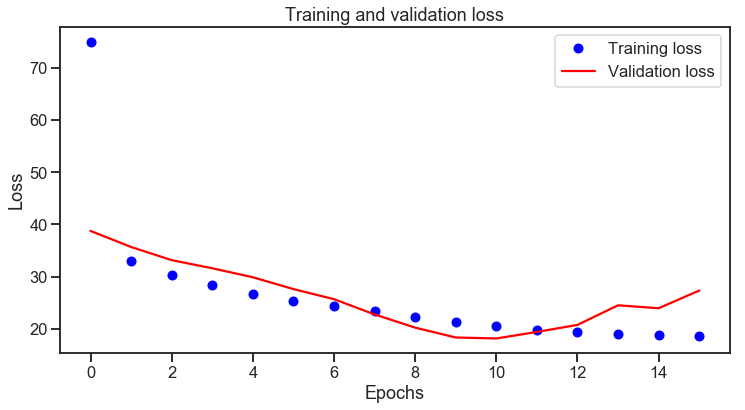

In [347]:
loss = basic_model_history.history['loss']
val_loss = basic_model_history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

fig.savefig(os.path.join(filepath, 'basic_model_history_training_validation_loss.png'))

In [348]:
print(np.argmin(val_loss))
#val_loss[70]

10


In [ ]:
hist_rmse = basic_model_history.history['rmse']
val_rmse = basic_model_history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Square Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Square Error')
plt.title('Training and Validation Root Mean Square Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'basic_model_history_training_validation_RMSE.png'))

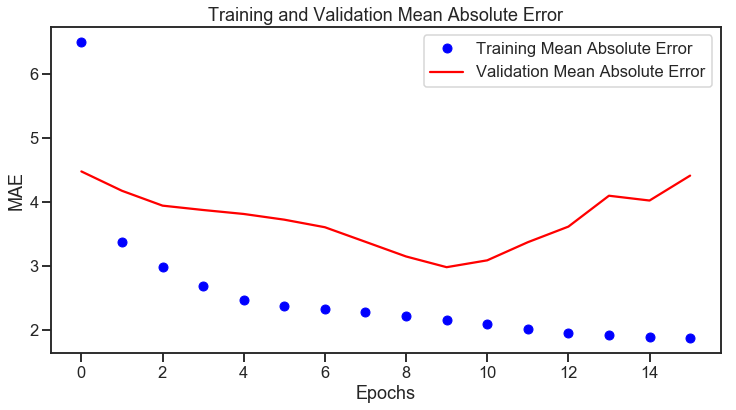

In [350]:
mae = basic_model_history.history['mean_absolute_error']
val_mae = basic_model_history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_mae = plt.figure(figsize=(12,6))
ax_mae = fig_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'basic_model_history_training_validation_mae.png'))

In [351]:
saved_model = load_model(os.path.join(filepath,'basic_lstm_model.h5'),  custom_objects={'rmse': rmse})

basic_lstm_model_train_evaluation = saved_model.evaluate(forecasters, pollution_real, verbose=0)
basic_lstm_model_test_evaluation = saved_model.evaluate(forecasters_test, pollution_real_test, verbose=0)
print(basic_lstm_model_train_evaluation)
print(basic_lstm_model_test_evaluation)

[20.03999092809994, 2.0317792009505125, 3.1754458829313754]
[86.7225147607999, 4.598553794316756, 6.6883582182419605]


In [352]:
basic_lstm_model_predictions = saved_model.predict(forecasters_test)
basic_lstm_model_evaluation =  saved_model.evaluate(forecasters_test, pollution_real_test)
print(basic_lstm_model_evaluation)
print(saved_model.metrics_names)

2496/2496 [==============================] - 0s 55us/step
[86.7225147607999, 4.598553794316756, 6.6883582182419605]
['loss', 'mean_absolute_error', 'rmse']


In [353]:
print(basic_lstm_model_predictions.shape)
print(basic_lstm_model_predictions.ravel().shape)

(2496, 1)
(2496,)


In [354]:
basic_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': pollution_real_test, 'Predicted PM2.5':basic_lstm_model_predictions.ravel()}) 
basic_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
basic_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'basic_lstm_model_predictions.csv'))

### Creation Neural Network Architecture,Training & Evaluation  On Recurrent LSTM and DROPOUT layers
The last parameter with the value 18 represents, the number of features

In [355]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import plot_model

deep_lstm_callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=5, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'deep_lstm_best_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

regressor_model = Sequential()
regressor_model.add(LSTM(units=100, return_sequences = True, input_shape = (forecasters.shape[1],18)))
regressor_model.add(Dropout(0.3))

regressor_model.add(LSTM(units = 50, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 50, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 50))
regressor_model.add(Dropout(0.2))

regressor_model.add(Dense(units = 1))

regressor_model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error',rmse] )

##Training the model
history = regressor_model.fit(forecasters, pollution_real,epochs = 100,
                              validation_data=(forecasters_validation,pollution_real_validation),batch_size = 32 , 
                              callbacks=deep_lstm_callbacks_list)

Train on 8738 samples, validate on 1247 samples
Epoch 1/100
8738/8738 [==============================] - 22s 3ms/step - loss: 52.9050 - mean_absolute_error: 4.6151 - rmse: 6.2903 - val_loss: 40.0913 - val_mean_absolute_error: 4.5318 - val_rmse: 5.3444
Epoch 2/100
8738/8738 [==============================] - 6s 710us/step - loss: 32.6183 - mean_absolute_error: 3.2099 - rmse: 5.0281 - val_loss: 40.2863 - val_mean_absolute_error: 4.5474 - val_rmse: 5.3645
Epoch 3/100
8738/8738 [==============================] - 6s 686us/step - loss: 32.4523 - mean_absolute_error: 3.1983 - rmse: 5.0188 - val_loss: 39.8105 - val_mean_absolute_error: 4.5082 - val_rmse: 5.3151 - loss: 31.9633 - mean_absolute_error: 3.1885 - rm
Epoch 4/100
8738/8738 [==============================] - 6s 686us/step - loss: 32.4095 - mean_absolute_error: 3.1866 - rmse: 5.0383 - val_loss: 39.9344 - val_mean_absolute_error: 4.5187 - val_rmse: 5.3280
Epoch 5/100
8738/8738 [==============================] - 6s 686us/step - loss: 32.

In [370]:
#regressor_model.save('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/airquality_prediction_bugolobi_04_20_2019.h5')

regressor_model.save(os.path.join(filepath,'airquality_prediction_model.h5'))
regressor_model.summary()
regressor_model_architecture_path = os.path.join(filepath, 'deep_lstm_model_plot.png')
plot_model(regressor_model, to_file=regressor_model_architecture_path, show_shapes=False, show_layer_names=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_37 (LSTM)               (None, 1, 100)            47600     
_________________________________________________________________
dropout_24 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
lstm_38 (LSTM)               (None, 1, 50)             30200     
_________________________________________________________________
dropout_25 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_39 (LSTM)               (None, 1, 50)             20200     
_________________________________________________________________
dropout_26 (Dropout)         (None, 1, 50)             0         
_________________________________________________________________
lstm_40 (LSTM)               (None, 50)                20200     
__________

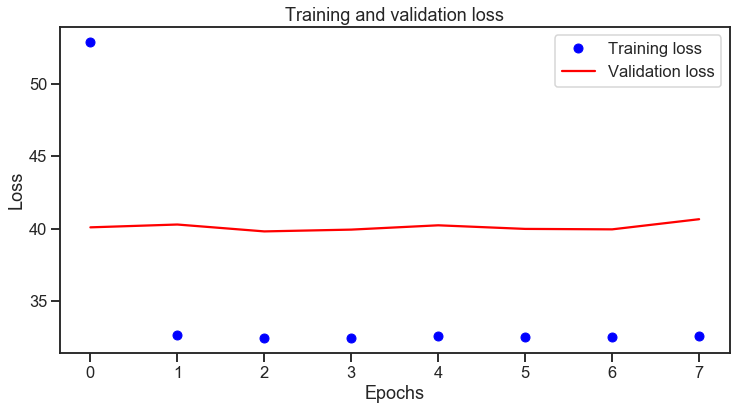

In [357]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig_deep_lstm_loss= plt.figure(figsize=(12,6))
ax = fig_deep_lstm_loss.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

fig_deep_lstm_loss.savefig(os.path.join(filepath, 'deep_lstm_model_history_training_validation_loss.png'))

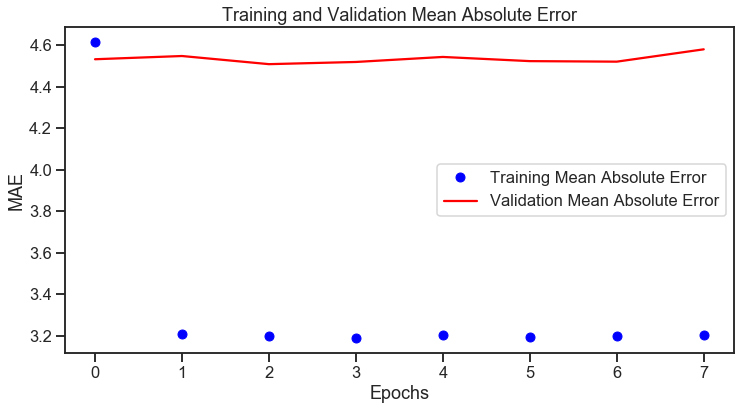

In [358]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_deep_lstm_mae = plt.figure(figsize=(12,6))
ax_mae = fig_deep_lstm_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'deep_lst_mmodel_history_training_validation_mae.png'))

In [ ]:
hist_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Squared Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Squared Error')
plt.title('Training and Validation Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'basic_model_history_training_validation_RMSE.png'))

### Making predictions (forecasts) using the deep recurrent lstm
1. Convert test set in the same format accepted by model
1. make the forecasts directly on the testing dataset

### Make prediction and evaluation using the developed deep lstm model

In [359]:
saved_best_deep_lstm_model = load_model(os.path.join(filepath,'deep_lstm_best_model.h5'),  custom_objects={'rmse': rmse})
deep_lstm_model_train_evaluation = saved_best_deep_lstm_model.evaluate(forecasters, pollution_real, verbose=0)
deep_lstm_model_test_evaluation = saved_best_deep_lstm_model.evaluate(forecasters_test, pollution_real_test, verbose=0)
print(deep_lstm_model_train_evaluation)
print(deep_lstm_model_test_evaluation)

[31.92528834673654, 3.140943225883297, 4.365459765523543]
[115.25322790023608, 6.22182341111012, 8.352543451847174]


In [360]:
deep_lstm_model_predictions = saved_best_deep_lstm_model.predict(forecasters_test)
deep_lstm_model_evaluation =  saved_best_deep_lstm_model.evaluate(forecasters_test, pollution_real_test)

deep_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': pollution_real_test, 'Predicted PM2.5':deep_lstm_model_predictions.ravel()}) 
deep_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
deep_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'deep_lstm_model_predictions.csv'))

2496/2496 [==============================] - 0s 105us/step


In [361]:
#print(forecasters_test.shape)
print(deep_lstm_model_predictions.shape)

(2496, 1)


In [362]:
print('predictions', deep_lstm_model_predictions.mean())
print('actual pm2.5 values', pollution_real_test.mean())

predictions 10.442364
actual pm2.5 values 11.5590625


### Verification of the average in the results of the forecasts and in the actual results

In [363]:
print('predictions', deep_lstm_model_predictions.mean())
print('actual pm2.5 values', pollution_real_test.mean())

predictions 10.442364
actual pm2.5 values 11.5590625


### Visualization of the predictions and actual values of PM2.5
1. #### using bar chart

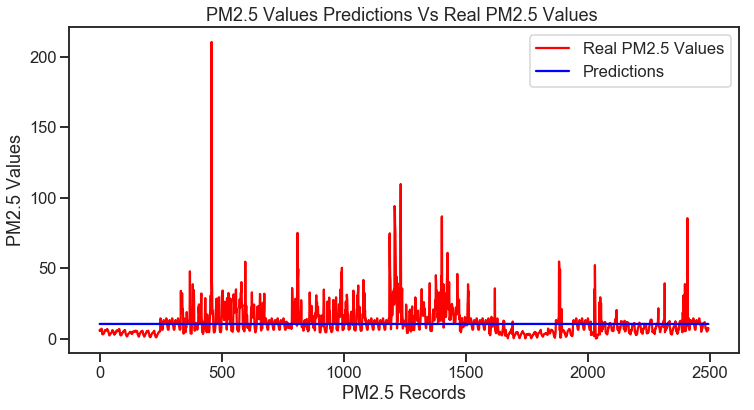

In [364]:
fig_deep_lstm_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_deep_lstm_predictions_vs_actual = fig_deep_lstm_predictions_vs_actual.add_subplot(111)
plt.plot(pollution_real_test, color = 'red', label = 'Real PM2.5 Values')
plt.plot(deep_lstm_model_predictions, color = 'blue', label = 'Predictions')
plt.title('PM2.5 Values Predictions Vs Real PM2.5 Values ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()

fig_deep_lstm_predictions_vs_actual.savefig(os.path.join(filepath, 'deep_lstm_model_prediction_vs_actual.png'))

### 2. using line graphs

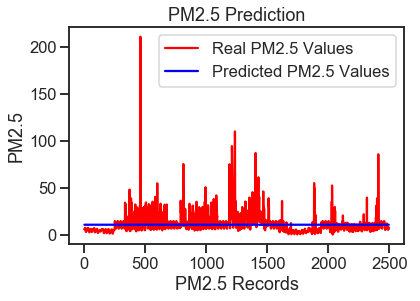

In [365]:
plt.plot(pollution_real_test, color = 'red', label = 'Real PM2.5 Values')
plt.plot(deep_lstm_model_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('PM2.5 Prediction')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

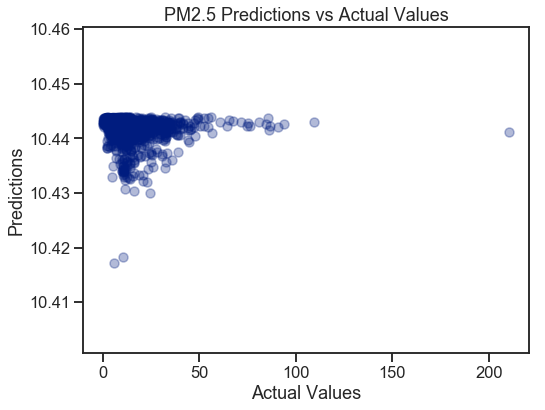

In [366]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
fig_deep_lstm_predictions_vs_actual_scatter = plt.figure(figsize=(8,6))
ax_fig_deep_lstm_predictions_vs_actual_scatter = fig_deep_lstm_predictions_vs_actual_scatter.add_subplot(111)
ax = ax_fig_deep_lstm_predictions_vs_actual_scatter
# we are going to use y_test, y_test_pred
ax.scatter(pollution_real_test, deep_lstm_model_predictions, alpha=.3)

ax.set(xlabel='Actual Values', 
       ylabel='Predictions',
       title='PM2.5 Predictions vs Actual Values');

fig_deep_lstm_predictions_vs_actual_scatter.savefig(os.path.join(filepath, 'deep_lstm_model_predictions_vs_actual_values_scatter.png'))

### saving results to file

In [367]:
with open(os.path.join(filepath, "results_summary.txt"), "w+") as text_file:
        print("SVR RMSE : {}\n SVR MAE : {} \n Basic LSTM: {} \n Deep LSTM : {}, \n metrics {}"
              .format(svr_rmse.round(2),svr_mae.round(2), basic_lstm_model_evaluation, deep_lstm_model_evaluation, model.metrics_names ), file=text_file)